<a href="https://colab.research.google.com/github/asha8r/2015-Street-Tree-Census/blob/main/2015_Street_Tree_Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
street_tree = pd.read_csv('/content/drive/MyDrive/a2/2015_Street_Tree_Census_-_Tree_Data_20240110.csv')
street_tree.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [4]:
street_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [5]:
street_tree.describe(include= 'all')

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
count,683788.000000,683788.000000,683788,683788.000000,683788.000000,683788,683788,652172,652169,652169,...,6.837880e+05,683788,683788.000000,683788.000000,6.837880e+05,683788.000000,677269.000000,677269.000000,6.742290e+05,6.742290e+05
unique,NaN,NaN,483,NaN,NaN,2,3,3,132,132,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,10/27/2015,NaN,NaN,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,...,NaN,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6852,NaN,NaN,656896,652173,528850,87014,87014,...,NaN,683788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365205.011085,313793.096236,NaN,11.279787,0.432463,NaN,NaN,NaN,NaN,NaN,...,3.404914e+06,NaN,40.701261,-73.924060,1.005280e+06,194798.424625,30.027330,11957.368422,3.495439e+06,3.413414e+09
std,208122.092902,114839.024312,NaN,8.723042,3.290241,NaN,NaN,NaN,NaN,NaN,...,1.175863e+06,NaN,0.090311,0.123583,3.428505e+04,32902.061114,14.301717,30745.739811,1.193275e+06,1.174892e+09
min,3.000000,100002.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,1.000201e+06,NaN,40.498466,-74.254965,9.133493e+05,120973.792200,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,186582.750000,221556.000000,NaN,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,3.011700e+06,NaN,40.631928,-73.980500,9.896578e+05,169515.153700,19.000000,202.000000,3.031991e+06,3.011240e+09
50%,366214.500000,319967.000000,NaN,9.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,4.008100e+06,NaN,40.700612,-73.912911,1.008386e+06,194560.252500,30.000000,516.000000,4.020352e+06,4.008560e+09
75%,546170.250000,404624.000000,NaN,16.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,4.103202e+06,NaN,40.762228,-73.834910,1.029991e+06,217019.571950,43.000000,1417.000000,4.263123e+06,4.105700e+09


In [6]:
street_tree.shape

(683788, 45)

In [7]:
street_tree.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [8]:
street_tree_subset =street_tree[['tree_id','created_at', 'tree_dbh',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'problems',
       'borocode', 'borough',
       'latitude', 'longitude'
          ]]
street_tree_subset.head()

,tree_id,created_at,tree_dbh,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,borocode,borough,latitude,longitude
0,180683,08/27/2015,3,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,None,4,Queens,40.723092,-73.844215
1,200540,09/03/2015,21,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,4,Queens,40.794111,-73.818679
2,204026,09/05/2015,3,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,3,Brooklyn,40.717581,-73.936608
3,204337,09/05/2015,10,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,3,Brooklyn,40.713537,-73.934456
4,189565,08/30/2015,21,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Stones,3,Brooklyn,40.666778,-73.975979


In [9]:
missing_values = street_tree_subset.isnull().sum()

missing_values

tree_id           0
created_at        0
tree_dbh          0
curb_loc          0
status            0
health        31616
spc_latin     31619
spc_common    31619
steward       31615
guards        31616
sidewalk      31616
problems      31664
borocode          0
borough           0
latitude          0
longitude         0
dtype: int64

In [10]:
duplicate_rows = street_tree_subset.duplicated().sum()
duplicate_rows

0

In [11]:
print(street_tree_subset['health'].value_counts(),'\n\n')
print(street_tree_subset['sidewalk'].value_counts(),'\n\n')
print(street_tree_subset['steward'].value_counts(),'\n\n')
print(street_tree_subset['guards'].value_counts(),'\n\n')


Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64 


NoDamage    464978
Damage      187194
Name: sidewalk, dtype: int64 


None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64 


None       572306
Helpful     51866
Harmful     20252
Unsure       7748
Name: guards, dtype: int64 




In [ ]:
street_tree_subset['health'].fillna('Good', inplace = True)
street_tree_subset['problems'].fillna('None', inplace = True)
street_tree_subset['spc_latin'].fillna('UnKnown', inplace = True)
street_tree_subset['sidewalk'].fillna('NoDamage', inplace = True)
street_tree_subset['steward'].fillna('None', inplace = True)
street_tree_subset['guards'].fillna('None', inplace = True)
street_tree_subset['spc_common'].fillna('Unknown', inplace = True)

In [13]:
missing_values = street_tree_subset.isnull().sum()
missing_values

tree_id       0
created_at    0
tree_dbh      0
curb_loc      0
status        0
health        0
spc_latin     0
spc_common    0
steward       0
guards        0
sidewalk      0
problems      0
borocode      0
borough       0
latitude      0
longitude     0
dtype: int64

In [14]:
street_tree_subset

,tree_id,created_at,tree_dbh,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,borocode,borough,latitude,longitude
0,180683,08/27/2015,3,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,None,4,Queens,40.723092,-73.844215
1,200540,09/03/2015,21,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,4,Queens,40.794111,-73.818679
2,204026,09/05/2015,3,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,3,Brooklyn,40.717581,-73.936608
3,204337,09/05/2015,10,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,3,Brooklyn,40.713537,-73.934456
4,189565,08/30/2015,21,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Stones,3,Brooklyn,40.666778,-73.975979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,08/18/2015,25,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,3,Brooklyn,40.713211,-73.954944
683784,183795,08/29/2015,7,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,None,4,Queens,40.715194,-73.856650
683785,166161,08/22/2015,12,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,None,5,Staten Island,40.620762,-74.136517
683786,184028,08/29/2015,9,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,None,2,Bronx,40.850828,-73.903115


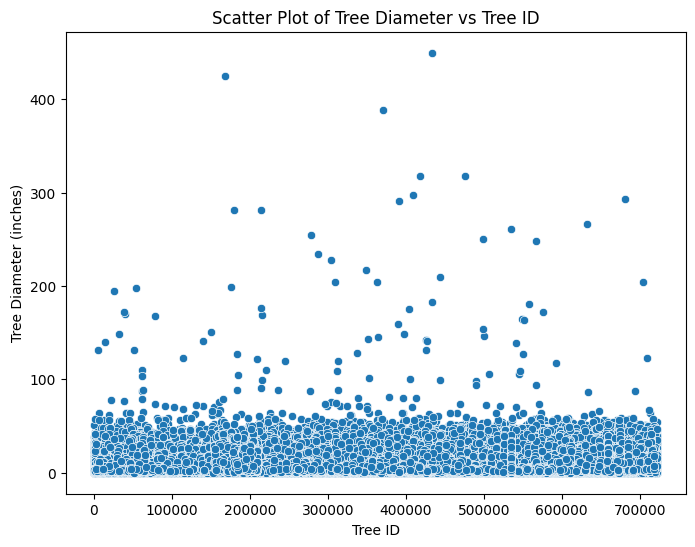

In [15]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tree_id', y='tree_dbh', data = street_tree_subset)
plt.title('Scatter Plot of Tree Diameter vs Tree ID')
plt.xlabel('Tree ID')
plt.ylabel('Tree Diameter (inches)')
plt.show()


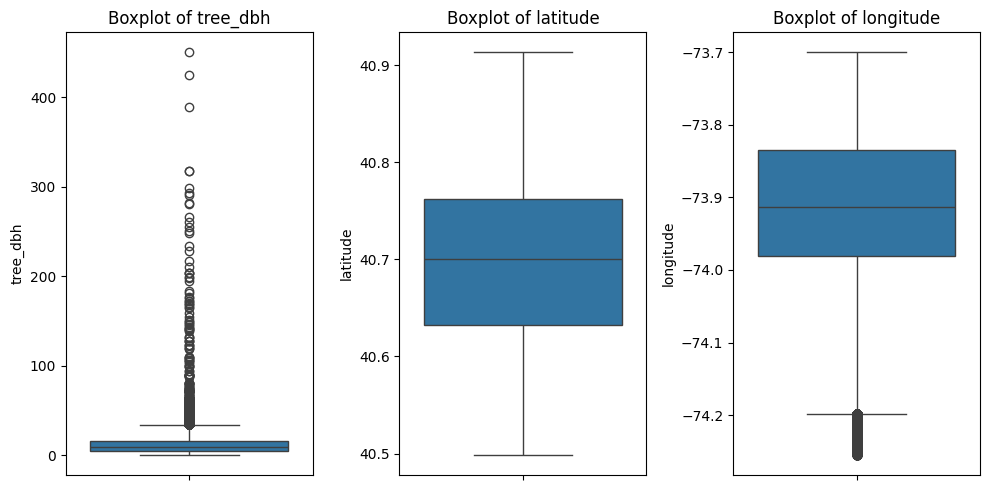

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['tree_dbh','latitude', 'longitude']

plt.figure(figsize=(10, 5))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=street_tree_subset[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [17]:
street_tree_subset['tree_dbh'].describe()

count    683788.000000
mean         11.279787
std           8.723042
min           0.000000
25%           4.000000
50%           9.000000
75%          16.000000
max         450.000000
Name: tree_dbh, dtype: float64

In [18]:
street_tree_subset['longitude'].describe()

count    683788.000000
mean        -73.924060
std           0.123583
min         -74.254965
25%         -73.980500
50%         -73.912911
75%         -73.834910
max         -73.700488
Name: longitude, dtype: float64

In [19]:
Q1 = street_tree_subset['tree_dbh'].quantile(0.25)
Q3 = street_tree_subset['tree_dbh'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers = street_tree_subset[(street_tree_subset['tree_dbh'] < lower_threshold) | (street_tree_subset['tree_dbh'] > upper_threshold)]

street_tree_no_outliers = street_tree_subset[~(street_tree_subset['tree_dbh'] < lower_threshold) & ~(street_tree_subset['tree_dbh'] > upper_threshold)]

original_shape = street_tree_subset.shape
cleaned_shape = street_tree_no_outliers.shape


print('original_shape',original_shape)
print('original_shape',cleaned_shape)
print('tree_dbh Description \n',outliers['tree_dbh'].describe())


original_shape (683788, 16)
original_shape (673530, 16)
tree_dbh Description 
 count    10258.000000
mean        39.961298
std         14.538159
min         35.000000
25%         36.000000
50%         38.000000
75%         40.000000
max        450.000000
Name: tree_dbh, dtype: float64


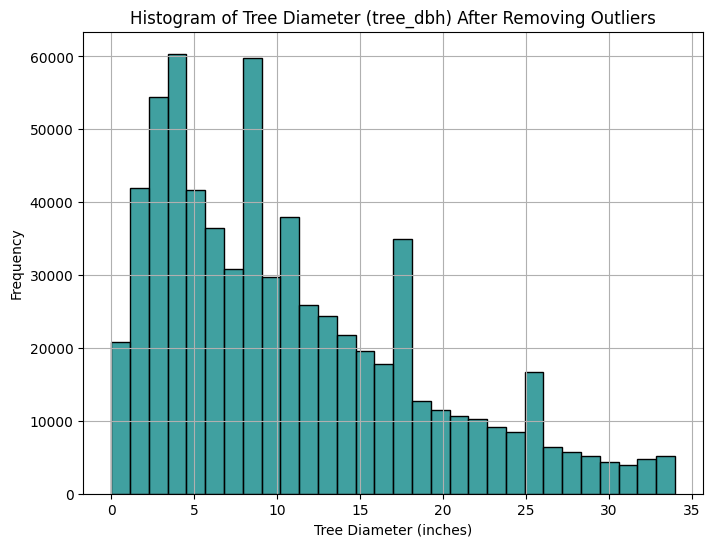

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(street_tree_no_outliers['tree_dbh'], bins=30, color='teal')
plt.title('Histogram of Tree Diameter (tree_dbh) After Removing Outliers')
plt.xlabel('Tree Diameter (inches)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
lat_long_summary = street_tree_subset[['latitude', 'longitude']].agg(['min', 'max'])
lat_long_summary


,latitude,longitude
min,40.498466,-74.254965
max,40.912918,-73.700488


In [22]:
street_tree_no_outliers

,tree_id,created_at,tree_dbh,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,borocode,borough,latitude,longitude
0,180683,08/27/2015,3,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,None,4,Queens,40.723092,-73.844215
1,200540,09/03/2015,21,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,4,Queens,40.794111,-73.818679
2,204026,09/05/2015,3,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,3,Brooklyn,40.717581,-73.936608
3,204337,09/05/2015,10,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,3,Brooklyn,40.713537,-73.934456
4,189565,08/30/2015,21,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Stones,3,Brooklyn,40.666778,-73.975979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,08/18/2015,25,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,3,Brooklyn,40.713211,-73.954944
683784,183795,08/29/2015,7,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,None,4,Queens,40.715194,-73.856650
683785,166161,08/22/2015,12,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,None,5,Staten Island,40.620762,-74.136517
683786,184028,08/29/2015,9,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,None,2,Bronx,40.850828,-73.903115


In [ ]:
def categorize_tree_size(dbh):

    if dbh < 12:
        return 'Small'
    elif 12 <= dbh < 24:
        return 'Medium'
    else:
        return 'Large'

street_tree_no_outliers['tree_size_category'] = street_tree_no_outliers['tree_dbh'].apply(categorize_tree_size)


In [24]:
street_tree_no_outliers[['tree_dbh', 'tree_size_category']]

,tree_dbh,tree_size_category
0,3,Small
1,21,Medium
2,3,Small
3,10,Small
4,21,Medium
...,...,...
683783,25,Large
683784,7,Small
683785,12,Medium
683786,9,Small


In [25]:
street_tree_no_outliers['tree_size_category'].value_counts()

Small     414038
Medium    198693
Large      60799
Name: tree_size_category, dtype: int64

In [26]:
street_tree_no_outliers.head()

,tree_id,created_at,tree_dbh,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,borocode,borough,latitude,longitude,tree_size_category
0,180683,08/27/2015,3,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,None,4,Queens,40.723092,-73.844215,Small
1,200540,09/03/2015,21,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,4,Queens,40.794111,-73.818679,Medium
2,204026,09/05/2015,3,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,3,Brooklyn,40.717581,-73.936608,Small
3,204337,09/05/2015,10,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,3,Brooklyn,40.713537,-73.934456,Small
4,189565,08/30/2015,21,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Stones,3,Brooklyn,40.666778,-73.975979,Medium


In [ ]:
import matplotlib.pyplot as plt

summary_stats = street_tree_no_outliers.describe()

health_distribution = street_tree_no_outliers['health'].value_counts()

common_species = street_tree_no_outliers['spc_common'].value_counts().head(10)

borough_distribution = street_tree_no_outliers['borough'].value_counts()

print(street_tree_no_outliers['created_at'].dtype)

street_tree_no_outliers['created_at'] = pd.to_datetime(street_tree_no_outliers['created_at'])

street_tree_no_outliers['year'] = street_tree_no_outliers['created_at'].dt.year

print(street_tree_no_outliers['year'].dtype)

yearly_distribution = street_tree_no_outliers['year'].value_counts()


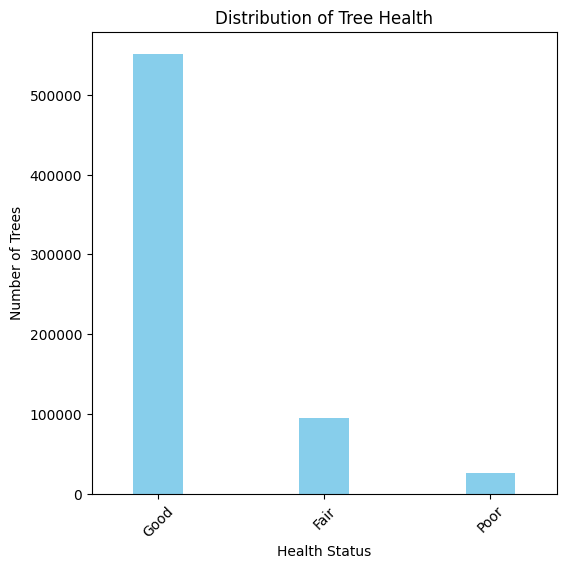

In [66]:
plt.figure(figsize=(6, 6))
health_distribution.plot(kind='bar', color='skyblue', width=0.3)
plt.title('Distribution of Tree Health')
plt.xlabel('Health Status')
plt.ylabel('Number of Trees')
plt.xticks(rotation=45)
plt.show()

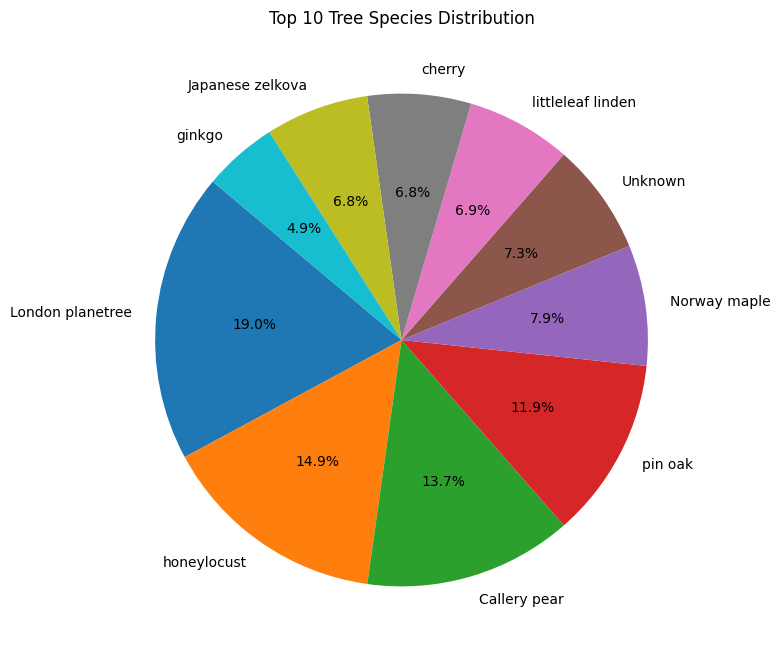

In [41]:
plt.figure(figsize=(8, 8))
common_species.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Tree Species Distribution')
plt.ylabel('')
plt.show()

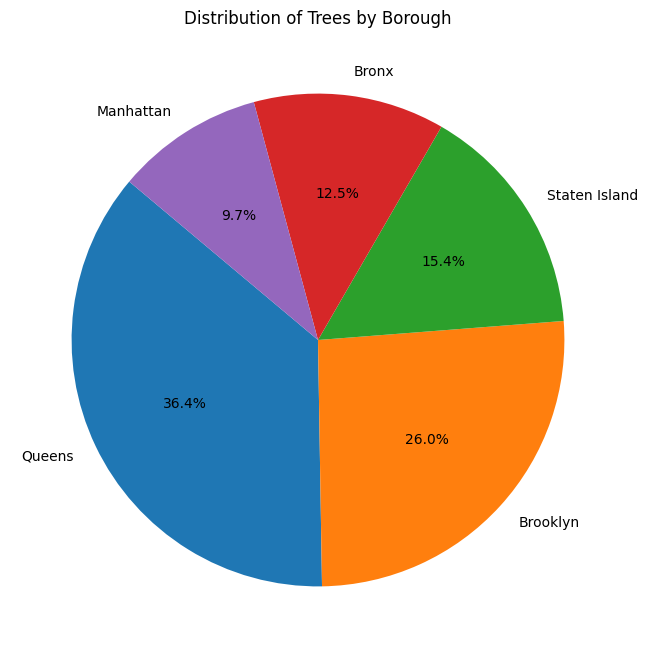

In [44]:
plt.figure(figsize=(8, 8))
borough_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Trees by Borough')
plt.ylabel('')
plt.show()

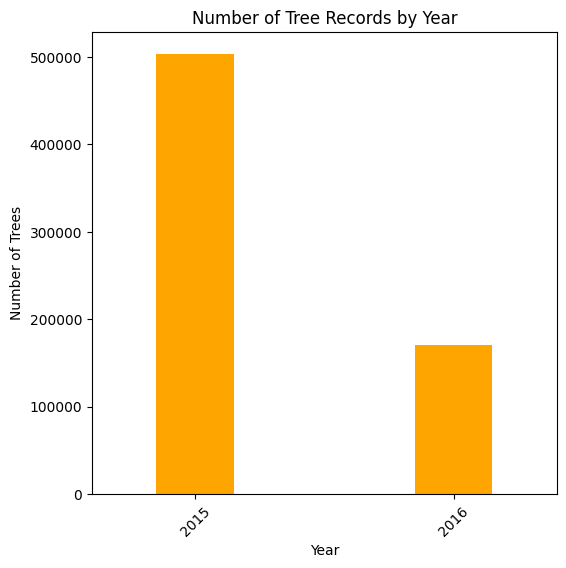

In [64]:
plt.figure(figsize=(6, 6))
yearly_distribution.plot(kind='bar', color='orange', width=0.3)
plt.title('Number of Tree Records by Year')
plt.xlabel('Year')
plt.ylabel('Number of Trees')
plt.xticks(rotation=45)
plt.show()

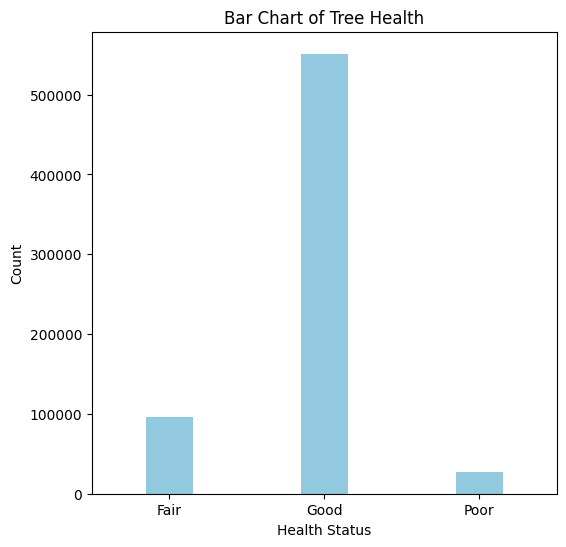

In [67]:
light_blue_color = 'skyblue'

plt.figure(figsize=(6, 6))

sns.countplot(x='health', data=street_tree_no_outliers, color=light_blue_color, width=0.3)

plt.title('Bar Chart of Tree Health')
plt.xlabel('Health Status')
plt.ylabel('Count')

plt.show()


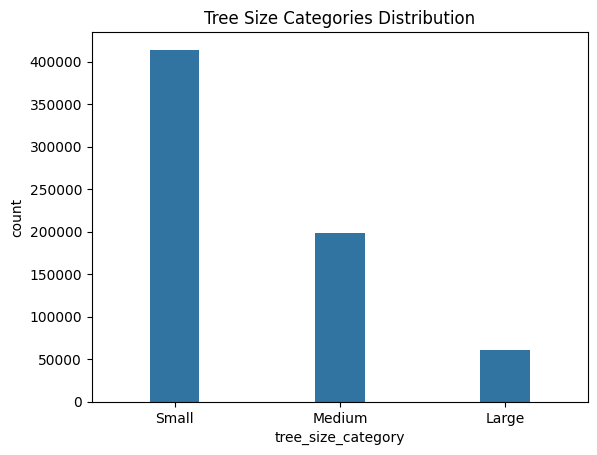

In [62]:
sns.countplot(x='tree_size_category', data=street_tree_no_outliers, width=0.3)

plt.title('Tree Size Categories Distribution')

plt.show()


In [82]:
frequency_analysis = {}
categorical_columns = ['health', 'borough', 'tree_size_category', 'spc_latin', 'spc_common']

for col in categorical_columns:
    counts = street_tree_no_outliers[col].value_counts()
    print(f"{counts}\n\n")


Good    551229
Fair     95632
Poor     26669
Name: health, dtype: int64


Queens           244966
Brooklyn         174935
Staten Island    103835
Bronx             84510
Manhattan         65284
Name: borough, dtype: int64


Small     414038
Medium    198693
Large      60799
Name: tree_size_category, dtype: int64


Platanus x acerifolia                 81853
Gleditsia triacanthos var. inermis    64218
Pyrus calleryana                      58902
Quercus palustris                     51141
Acer platanoides                      34096
                                      ...  
Pinus nigra                              37
Pinus rigida                             33
Maclura pomifera                         29
Pinus sylvestris                         25
Pinus virginiana                         10
Name: spc_latin, Length: 133, dtype: int64


London planetree    81853
honeylocust         64218
Callery pear        58902
pin oak             51141
Norway maple        34096
                    ...  

In [92]:
grouped_analysis_borough = street_tree_subset.groupby('borough')['tree_dbh'].mean()
print('grouped_analysis_borough\n\n', grouped_analysis_borough)


grouped_analysis_borough

 borough
Bronx             9.693649
Brooklyn         11.738884
Manhattan         8.473641
Queens           12.557870
Staten Island    10.492746
Name: tree_dbh, dtype: float64


In [93]:
grouped_analysis_health = street_tree_subset.groupby('health')['tree_dbh'].mean()
print('grouped_analysis_health\n\n', grouped_analysis_health )

grouped_analysis_health

 health
Fair    10.990487
Good    11.437102
Poor     9.033112
Name: tree_dbh, dtype: float64


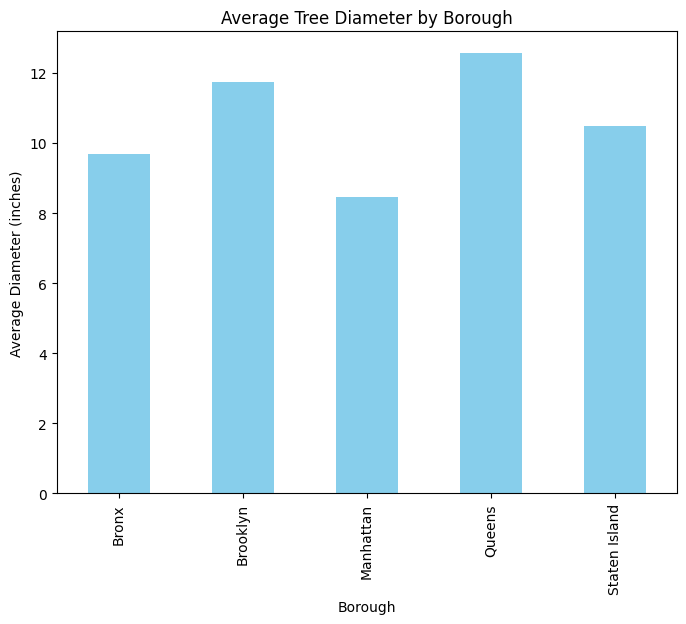

In [96]:
plt.figure(figsize=(8, 6))
grouped_analysis_borough.plot(kind='bar', color='skyblue')
plt.title('Average Tree Diameter by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Diameter (inches)')
plt.show()

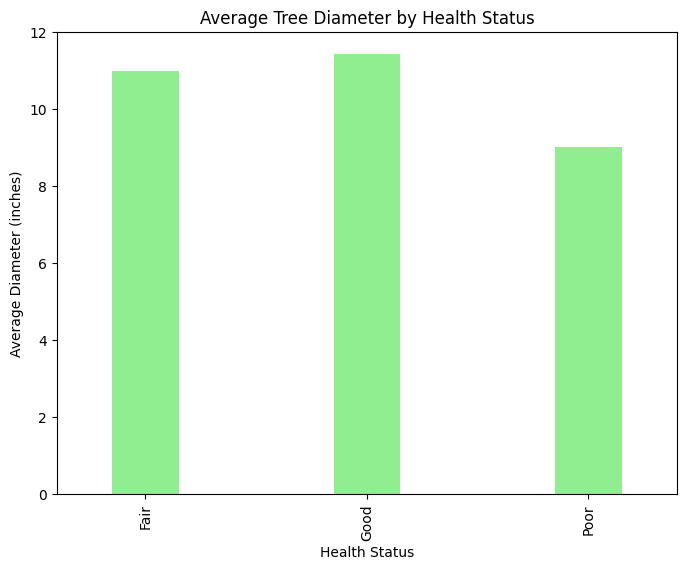

In [99]:
plt.figure(figsize=(8, 6))
grouped_analysis_health.plot(kind='bar', color='lightgreen', width = 0.3)
plt.title('Average Tree Diameter by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Average Diameter (inches)')
plt.show()
